In [1]:
"""
Speech Emotion Analysis using Tensorflow

Data: RAVDESS - https://zenodo.org/record/1188976
"""

'\nSpeech Emotion Analysis using Tensorflow\n\nData: RAVDESS - https://zenodo.org/record/1188976\n'

In [2]:
category_emotion = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
category_gender = ['female', 'male']

In [3]:
import tensorflow as tf
print("tensorflow version - ", tf.__version__)

tensorflow version -  2.0.0-alpha0


In [4]:
import pathlib
data_root = pathlib.Path('data/')

print(data_root)

data


In [5]:
fileList = list(data_root.glob('*/*.wav'))

In [6]:
from dataclasses import dataclass
import pandas as pd
import numpy as np

def process_inputfiles(fileList):
    
    input_label_list = []
    for file in fileList:
        fileNameParts = file.stem.split('-')
        input_label = {}
        input_label['path'] = file
        input_label['name'] = file.stem
        input_label['emotion'] = category_emotion[int(fileNameParts[2])-1]
        input_label['gender'] = category_gender[(int(fileNameParts[6])%2)]
        input_label_list.append(input_label)
        
    return pd.DataFrame(input_label_list)

In [7]:
df = process_inputfiles(fileList)

print(df)

        emotion  gender                  name  \
0         angry  female  03-01-05-01-02-01-16   
1       fearful  female  03-01-06-01-02-02-16   
2       fearful  female  03-01-06-02-01-02-16   
3         angry  female  03-01-05-02-01-01-16   
4       disgust  female  03-01-07-01-01-01-16   
5           sad  female  03-01-04-01-01-02-16   
6           sad  female  03-01-04-02-02-02-16   
7       disgust  female  03-01-07-02-02-01-16   
8     surprised  female  03-01-08-02-02-01-16   
9     surprised  female  03-01-08-01-01-01-16   
10        happy  female  03-01-03-02-02-02-16   
11        happy  female  03-01-03-01-01-02-16   
12         calm  female  03-01-02-02-01-01-16   
13      neutral  female  03-01-01-01-02-02-16   
14         calm  female  03-01-02-01-02-01-16   
15        happy  female  03-01-03-02-01-01-16   
16        happy  female  03-01-03-01-02-01-16   
17         calm  female  03-01-02-02-02-02-16   
18         calm  female  03-01-02-01-01-02-16   
19      neutral  fem

In [8]:
df['emotion_original'] = df['emotion']
df['gender_original'] = df['gender']
df = pd.get_dummies(df, columns=['emotion','gender'])
df.head()

,name,path,emotion_original,gender_original,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,gender_female,gender_male
0,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav,angry,female,1,0,0,0,0,0,0,0,1,0
1,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav,fearful,female,0,0,0,1,0,0,0,0,1,0
2,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav,fearful,female,0,0,0,1,0,0,0,0,1,0
3,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav,angry,female,1,0,0,0,0,0,0,0,1,0
4,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav,disgust,female,0,0,1,0,0,0,0,0,1,0


In [9]:
df.describe()

,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,gender_female,gender_male
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.133333,0.133333,0.133333,0.133333,0.133333,0.066667,0.133333,0.133333,0.500000,0.500000
std,0.340053,0.340053,0.340053,0.340053,0.340053,0.249530,0.340053,0.340053,0.500174,0.500174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.shape

(1440, 14)

In [13]:
import matplotlib.pyplot as plt
import librosa, librosa.display

def plot_audio(audioFileName, emotion, gender):
    
    fig = plt.figure(figsize=(16, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    y, sr = librosa.load(audioFileName)
    y = librosa.util.fix_length(y, 4*sr)
    
    plt.suptitle(emotion + ' - ' + gender)

    plt.subplot(2, 2, 1)
    librosa.display.waveplot(y, sr=sr)
    plt.title('Monophonic')
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel spectogram')
    
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.subplot(2, 2, 3)
    librosa.display.specshow(D, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log power spectrogram')
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.subplot(2, 2, 4)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')

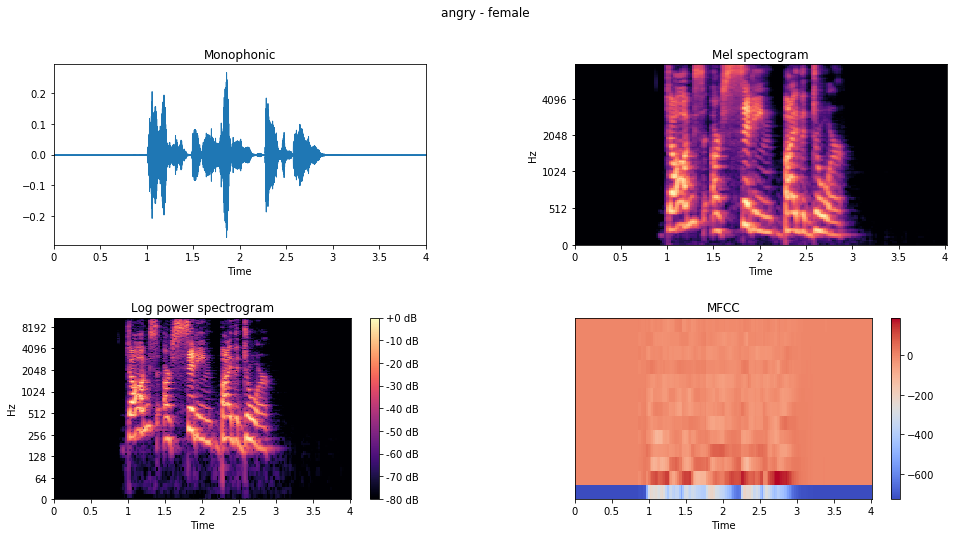

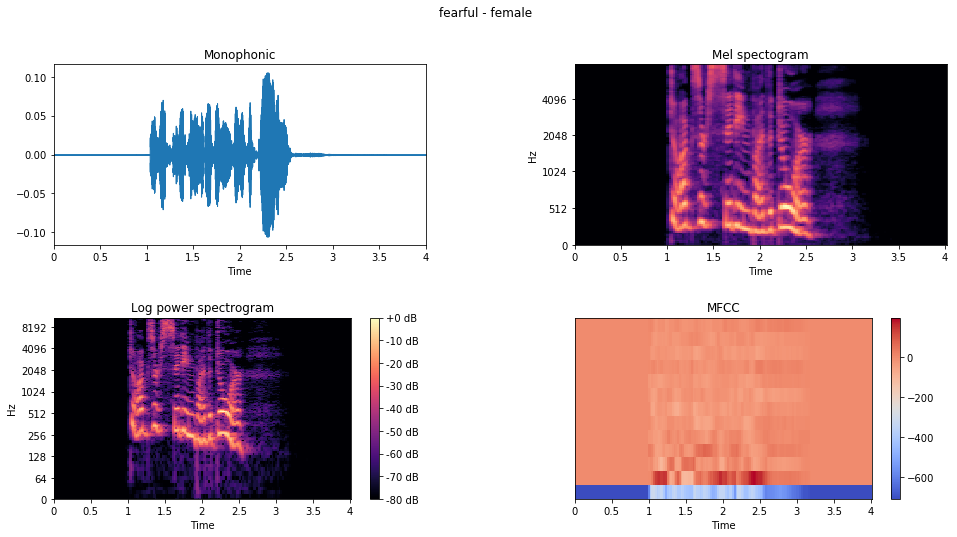

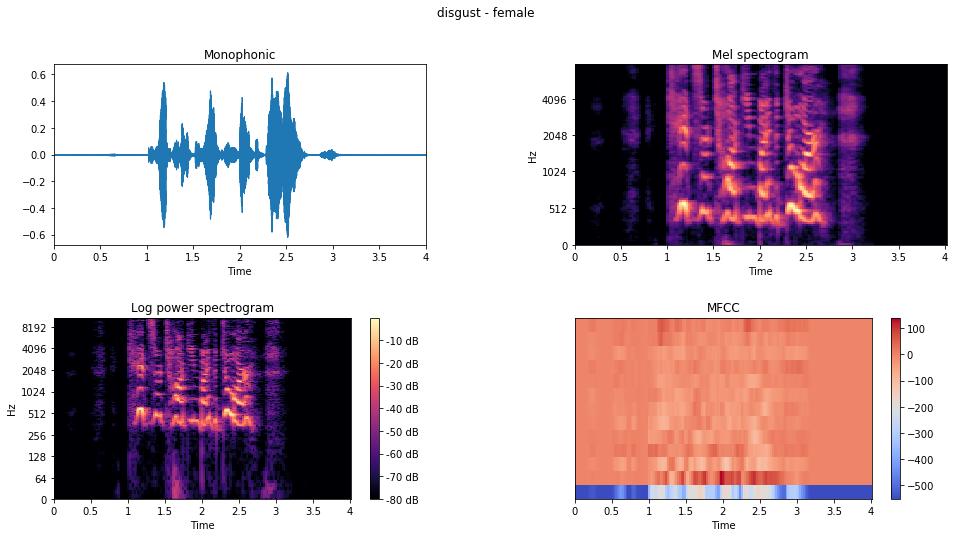

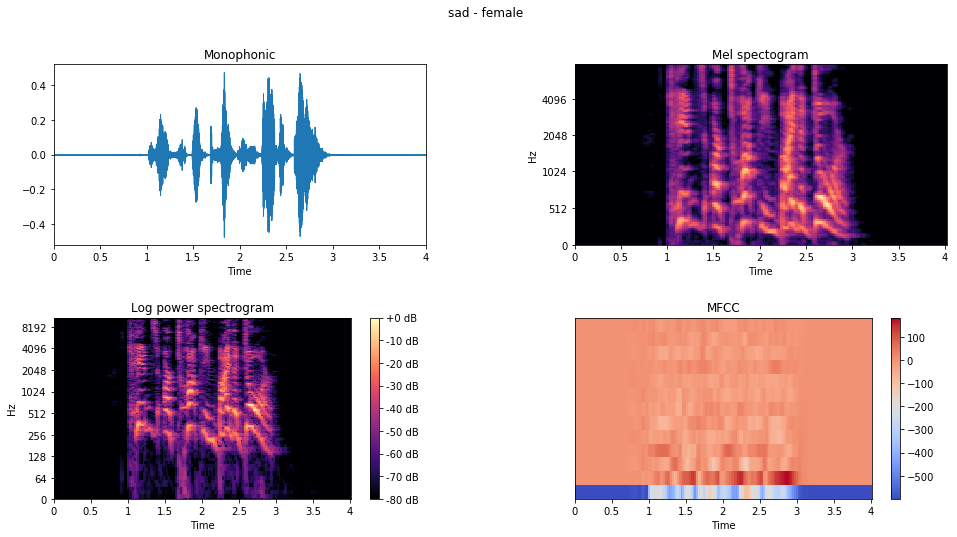

In [14]:
plot_audio(df.iloc[0].path, df.iloc[0].emotion_original, df.iloc[0].gender_original)
plot_audio(df.iloc[1].path, df.iloc[1].emotion_original, df.iloc[1].gender_original)
plot_audio(df.iloc[2].path, df.iloc[4].emotion_original, df.iloc[4].gender_original)
plot_audio(df.iloc[3].path, df.iloc[5].emotion_original, df.iloc[5].gender_original)
